In [17]:
import os
import numpy as np
import pandas as pd

#plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#getting data
from pydob.exploratory import (
    
                        get_issuance_rates_df,
                        get_issuance_num_df,
                        get_issuance_rates_type_df,
                        applications_year,
                        permits_year,
                        savefig,
                        get_year_counts,
                        get_dataset_type_df,
                        permits_now_year
                    )

from pydob.settings import nt_style, nt_blue, nt_black

In [18]:
%matplotlib inline
plt.style.use(nt_style)

# 1. Applications and permits relations

# Applications and permits trend, pct change

In [19]:
permits_now_year = permits_now_year()
permits_now_year.columns = ['permits_now']


In [20]:
applications_year= applications_year()
permits_year = permits_year()

In [22]:
table_to_plot = applications_year.join(permits_year).join(permits_now_year)
table_to_plot.columns = ['applications','permits','permits_now']
table_to_plot = table_to_plot.loc[2000:2019]

In [24]:
permit_applic_rate_assum = table_to_plot.loc[2016].permits / table_to_plot.loc[2016].applications

In [25]:
table_to_plot.permits_now = table_to_plot.permits_now.fillna(0)
table_to_plot['permits_total'] = table_to_plot.permits+table_to_plot.permits_now
table_to_plot.loc[2017,'applications'] = table_to_plot.loc[2017,'permits_total']/permit_applic_rate_assum

table_to_plot.loc[2018,'applications'] = table_to_plot.loc[2018,'permits_total']/permit_applic_rate_assum

table_to_plot.loc[2019,'applications'] = table_to_plot.loc[2019,'permits_total']/permit_applic_rate_assum

table_to_plot.drop(columns=['permits_now','permits'],inplace=True)

In [26]:
table_to_plot

,applications,permits_total
pre_filing_date_year,,
2000,67735.000000,101496.0
2001,67320.000000,105728.0
2002,70045.000000,111931.0
2003,72817.000000,122595.0
2004,80833.000000,137618.0
2005,86264.000000,150087.0
2006,86896.000000,155861.0
2007,90201.000000,158250.0
2008,84548.000000,150370.0


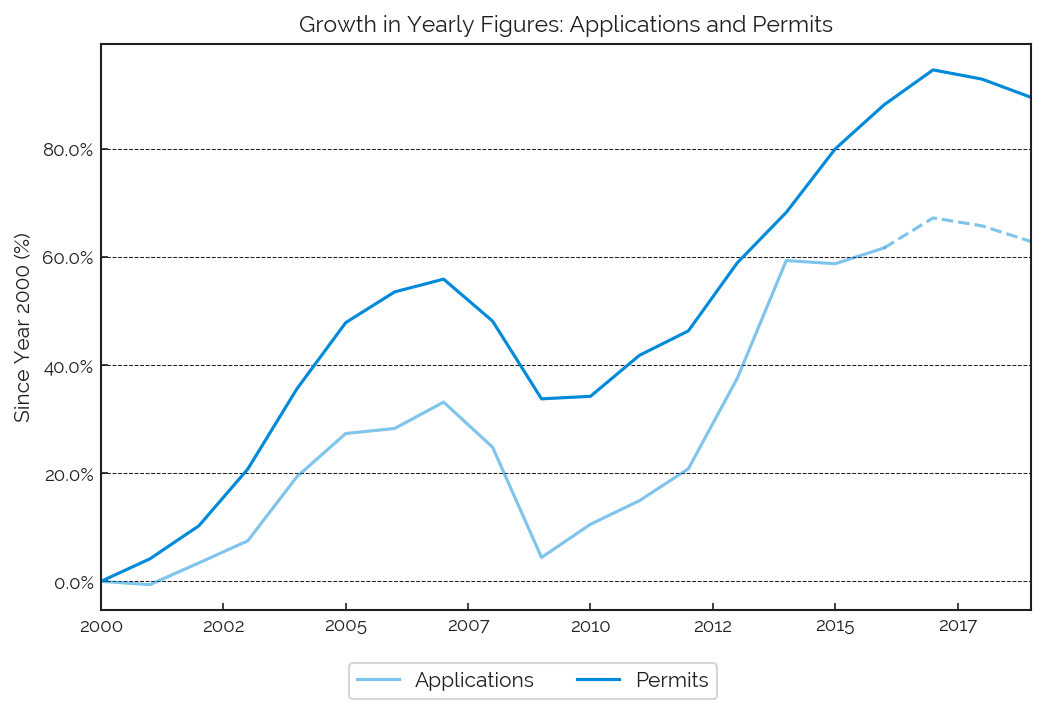

In [30]:
fig, ax = plt.subplots()

table_to_plot_normed = table_to_plot / table_to_plot.iloc[0]
table_to_plot_normed = (table_to_plot_normed - 1) * 100

ax = table_to_plot_normed['applications'].loc[:2016].plot(alpha = .5,
                                                           label = 'Applications', 
                                                           color = nt_blue)
ax = table_to_plot_normed['applications'].loc[2016:].plot(alpha = .5,
                                                           label = '_',
                                                           color = nt_blue, 
                                                           linestyle = '--')

ax.plot(table_to_plot_normed.index,
        table_to_plot_normed.permits_total, 
        color = nt_blue,
        alpha = 1,
        label = "Permits")

l = ax.legend(loc='center left', 
           bbox_to_anchor=(0.255, -0.125),
           fancybox=True,
           shadow=False, 
           ncol=4)

xlabs = ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ylabs = ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%s%%'))
plt.title("Growth in Yearly Figures: Applications and Permits")
ylab = ax.set_ylabel("Since Year 2000 (%)")
xlab = ax.set_xlabel(None)
g = plt.grid(axis="y")

ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)

savefig("percent_change_appli_permits.png", fig, bottom=.125)

In [31]:
table_to_plot_normed

,applications,permits_total
pre_filing_date_year,,
2000,0.000000,0.000000
2001,-0.612682,4.169622
2002,3.410349,10.281193
2003,7.502768,20.788011
2004,19.337123,35.589580
2005,27.355134,47.874793
2006,28.288182,53.563687
2007,33.167491,55.917475
2008,24.821732,48.153622


#  Application Issuance Rate Analysis <a class="anchor" id="step3"></a>

In [27]:
# preparing table
acceptance_rates = get_issuance_rates_df()
acceptance_rates = acceptance_rates * 100

acceptance_nums =get_issuance_num_df()
acceptance_nums = acceptance_nums / 1000

acceptance_rates = acceptance_rates.rename("acceptance_rate").to_frame()
acceptance_nums = acceptance_nums.rename(columns={"approved": "acceptance_num"})

In [167]:
acceptance_to_plot = acceptance_rates.join(acceptance_nums)

## Adding DoB NOW permits to the table

In [126]:
permits_now_year_counts = get_year_counts(index_col='job_filing_number',
                                          year_col='issued_date_year', 
                                          dataset_name='permits_now')

permits_now_year_counts.columns = ['approved_counts']


In [127]:
permits_now_year_counts = permits_now_year_counts/1000

In [168]:
acceptance_to_plot = acceptance_to_plot.join(permits_now_year_counts)
acceptance_to_plot.columns = ['acceptance_rate','acceptance_num','permit_now']

In [169]:
acceptance_to_plot = acceptance_to_plot.loc[:2019]

In [170]:
acceptance_to_plot.loc[2017, 'acceptance_rate']= acceptance_to_plot.acceptance_rate.loc[2016:2016].values
acceptance_to_plot.loc[2018, 'acceptance_rate'] = acceptance_to_plot.acceptance_rate.loc[2016:2016].values
acceptance_to_plot.loc[2019, 'acceptance_rate'] = acceptance_to_plot.acceptance_rate.loc[2016:2016].values

**notes**
- add number of permits issued as per DoB NOW (for 2017 - 2029)
- let's assume a constant issuance rate (whatever it was for 2016)
- and then get applications from $\large \frac {issued}{rate}$

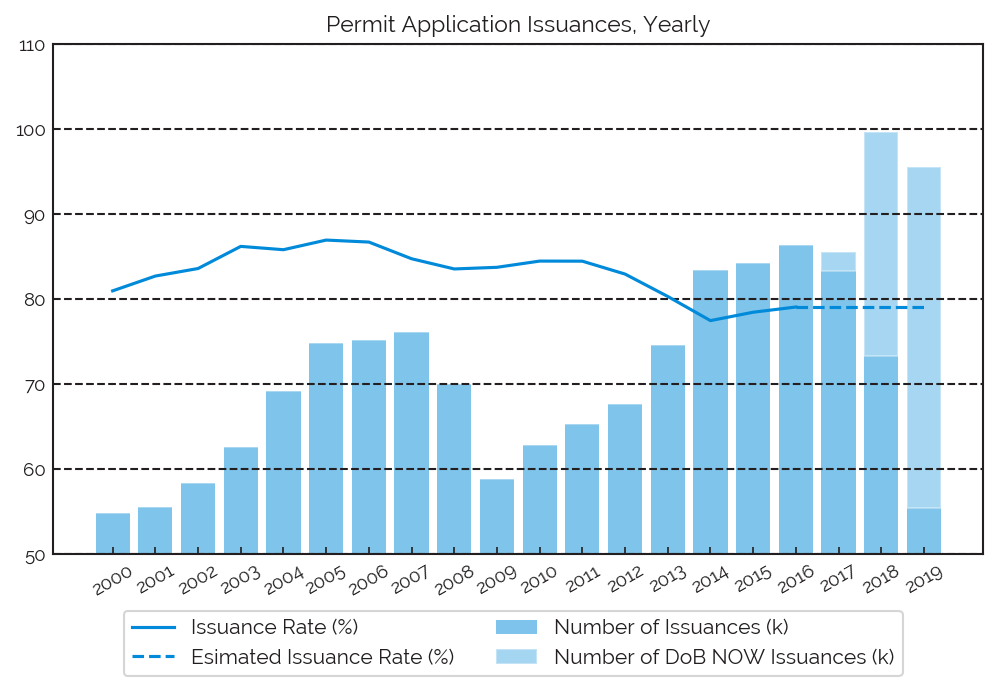

In [151]:
# ploting
fig, ax = plt.subplots()
# ax2 = ax.twinx()
ax.bar(acceptance_to_plot.index, 
       acceptance_to_plot["acceptance_num"], 
       color=nt_blue, 
       label='Number of Issuances (k)',
       alpha = 0.5)

ax.bar(acceptance_to_plot.index, 
        acceptance_to_plot["permit_now"],
        bottom=acceptance_to_plot.acceptance_num, 
        color=nt_blue,
        alpha = 0.35, 
        edgecolor='white',
        label = 'Number of DoB NOW Issuances (k)')

ax.plot(acceptance_to_plot.index[:17], 
         acceptance_to_plot["acceptance_rate"].loc[:2016], 
         color=nt_blue, 
         label='Issuance Rate (%)')

ax.plot(acceptance_to_plot.index[16:], 
         acceptance_to_plot["acceptance_rate"].loc[2016:],
         linestyle = '--',
         color=nt_blue, 
         label='Esimated Issuance Rate (%)')

# xaxis labeling
ax.set_xticklabels(acceptance_to_plot.index,rotation=30)
ax.set_xticks(acceptance_to_plot.index )
# l = ax.legend()
# l2 = ax2.legend(loc = "upper left")
ax.legend(loc='center left', 
           bbox_to_anchor=(0.065, -0.175),
           fancybox=True,
           shadow=False, 
           ncol=2)

# limiting yaxis
ylim = ax.set_ylim([50, 110])
ylab = ax.set_ylabel(None)
# ylim2 = ax.set_ylim([70, 92])
# ylab2 = ax.set_ylabel("Number Accepted (K)", rotation=270, labelpad=22.5)
 
# formating grid line
ax.grid(axis="y", color=nt_black, linestyle="--", linewidth=1)

t = plt.title("Permit Application Issuances, Yearly")

ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)

savefig("permit_issuance_rates.png", fig, bottom=0.2)

In [171]:
acceptance_to_plot_total = acceptance_to_plot
acceptance_to_plot_total.permit_now.fillna(0, inplace =True)

In [172]:
acceptance_to_plot_total['permits_total'] = acceptance_to_plot_total.acceptance_num \
                                                        + acceptance_to_plot_total.permit_now

In [173]:
acceptance_to_plot_total['application_num'] = acceptance_to_plot_total.permits_total /(
                                                                acceptance_to_plot_total.acceptance_rate
                                                                /100
                                                            )

In [174]:
acceptance_to_plot_total.application_num/acceptance_to_plot_total.application_num.iloc[0]-1

pre_filing_date_year
2000    0.000000
2001   -0.008110
2002    0.032026
2003    0.073462
2004    0.190649
2005    0.271852
2006    0.281188
2007    0.327543
2008    0.237994
2009    0.038777
2010    0.098973
2011    0.143024
2012    0.204136
2013    0.372287
2014    0.590620
2015    0.585331
2016    0.614183
2017    0.597409
2018    0.862492
2019    0.785699
Name: application_num, dtype: float64

In [175]:
acceptance_to_plot.loc[2016:, "application_num"] =  acceptance_to_plot.loc[
                                                                    2016:, "permits_total"
                                                                ] / (acceptance_to_plot.loc[
                                                                                    2016:, "acceptance_rate"
                                                                            ] / 100)

In [176]:
acceptance_to_plot

,acceptance_rate,acceptance_num,permit_now,permits_total,application_num
pre_filing_date_year,,,,,
2000,80.982347,54.821,0.000,54.821,67.695000
2001,82.724213,55.546,0.000,55.546,67.146000
2002,83.610781,58.413,0.000,58.413,69.863000
2003,86.214014,62.650,0.000,62.650,72.668000
2004,85.823997,69.175,0.000,69.175,80.601000
2005,86.956724,74.868,0.000,74.868,86.098000
2006,86.724317,75.216,0.000,75.216,86.730000
2007,84.760983,76.173,0.000,76.173,89.868000
2008,83.559650,70.028,0.000,70.028,83.806000


## Acceptance Rates for Top Application Categories

- nice chart, but may exclude
- some categories disappear / are merged in an un-clean way over time
- this complicates taking a time-series view at the category level

In [14]:
acceptance_rates_categories = get_issuance_rates_type_df()

In [15]:
acceptance_rates_categories= acceptance_rates_categories.loc[2010:].to_frame()

In [16]:
acceptance_rates_categories.columns = ["acceptance_rate"]

In [17]:
acceptance_rates_categories_top3 =acceptance_rates_categories.groupby(level='pre_filing_date_year')\
                                                             .apply(lambda x: x.nlargest(3,columns = ['acceptance_rate']))\
                                                             .reset_index(level =0, drop = True)

In [18]:
acceptance_rates_categories_top3= acceptance_rates_categories_top3.loc[2010:2018]

In [19]:
acceptance_colors= ['#006ead',
                    '#008ad9',
                    '#32a1e0',
                    '#7fc4ec',
                    '#b2dbf3',
                    '#e5f3fb', 
                    '#ffffff']

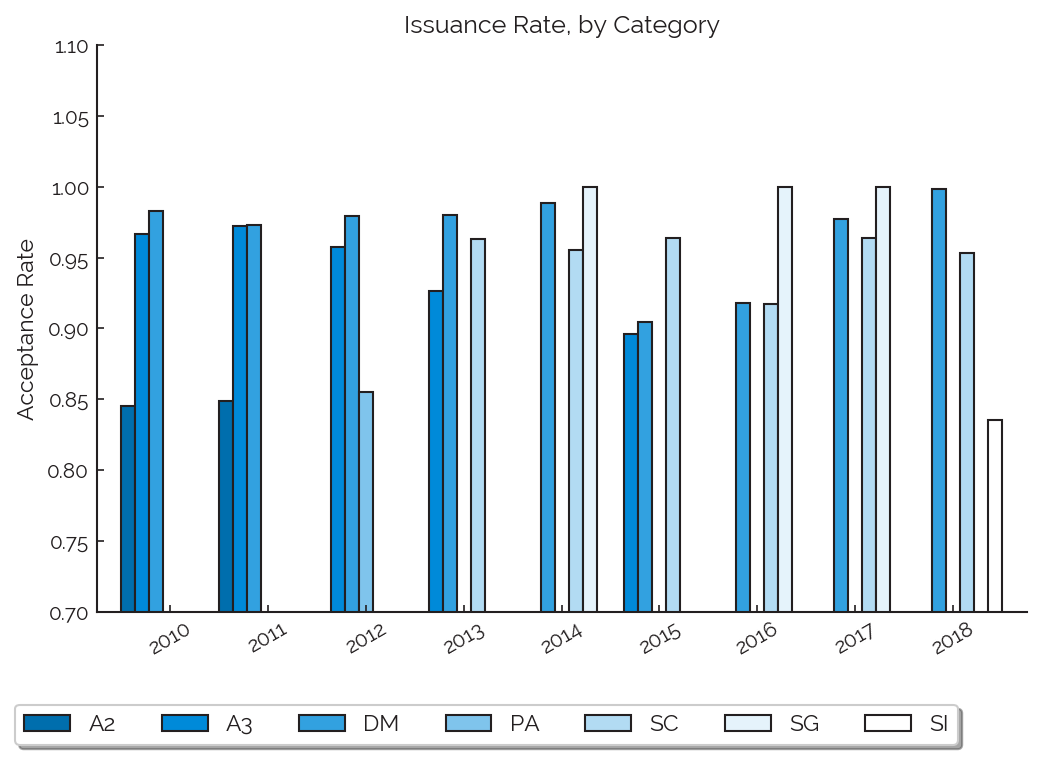

In [20]:
to_plot = acceptance_rates_categories_top3.unstack()

to_plot.columns = to_plot.columns.droplevel()
ax =to_plot.plot(kind = "bar", 
                 width = 1,
                 color=acceptance_colors, 
                 stacked = False, 
                 ylim=[0.7,1.1],
                 edgecolor = nt_black)

# Put a legend to the right of the current axis

plt.legend(loc='center left', 
           bbox_to_anchor=(-0.1, -0.2),
           fancybox=True,
           shadow=True, 
           ncol=7)

ylab = ax.set_ylabel("Acceptance Rate")
xlab = ax.set_xlabel(None)
xticklabels = to_plot.index
ax.set_xticklabels(xticklabels, rotation = 30)
title = plt.title("Issuance Rate, by Category")


Expected values are:

- A1 = Alteration Type I, A major alteration that will change the use, egress, or occupancy of the building.

- A2 = Alteration Type II, An application with multiple types of work that do not affect the use, egress, or occupancy of the building.

- A3 = Alteration Type III, One type of minor work that doesn't affect the use, egress, or occupancy of the building.

- NB = New Building, An application to build a new structure. “NB” cannot be selected if any existing building elements are to remain—for example a part of an old foundation, a portion of a façade that will be incorporated into the construction, etc.

- DM = Demolition, An application to fully or partially demolish an existing building.

- PA = A Place of Assembly (PA) Certificate of Operation is required for premises where 75 or more members of the public gather indoors 	

- SC = Subdivision Condominiums, The division of a tax lot into several smaller tax lots allowing each condominium to have its own tax lot.

- SI = Subdivision Improved, An improved subdivision is when one lot is being broken into several smaller lots. The Department of Finance must 			assign new lot numbers to subdivisions.